In [90]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [92]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /home/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [93]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_group_models_box_plot_per_test_set

## Initialize Configs

In [94]:
EXPERIMENT_NAME = 'one_repair_lvl_many_models'
DB_COLLECTION_NAME = f'exp_{EXPERIMENT_NAME}'
DATASET_NAME = 'Folktables_NY_2018_Employment'
EXPERIMENT_SESSION_UUID = '42eab82d-3396-491d-a457-6260b1caecae'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'SEX&RAC1P']
MODEL_NAMES = ['LGBMClassifier', 'LogisticRegression', 'RandomForestClassifier', 'MLPClassifier']

In [95]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [96]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [97]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(864, 35)

In [98]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
0,Accuracy,100,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Folktables_NY_2018_Employment,200,0,OK,2023-07-14 21:41:46.704,...,0.802326,1.000000,0.000000,0.771400,1.000000,0.000000,0.807349,1.000000,0.000000,0.789500
1,Accuracy,100,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Folktables_NY_2018_Employment,200,1,OK,2023-07-14 21:41:46.715,...,0.773816,1.000000,0.000000,0.779330,1.000000,0.000000,0.764579,1.000000,0.000000,0.772500
2,Accuracy,100,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Folktables_NY_2018_Employment,200,2,OK,2023-07-14 21:41:46.726,...,0.771479,1.000000,0.000000,0.779330,1.000000,0.000000,0.767819,1.000000,0.000000,0.774000
3,Accuracy,100,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Folktables_NY_2018_Employment,200,3,OK,2023-07-14 21:41:46.736,...,0.764465,1.000000,0.000000,0.765363,1.000000,0.000000,0.760259,1.000000,0.000000,0.763000
4,Accuracy,100,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Folktables_NY_2018_Employment,200,0,OK,2023-07-15 01:29:59.648,...,0.802326,1.000000,0.000000,0.776435,1.000000,0.000000,0.804369,1.000000,0.000000,0.790500
5,Accuracy,100,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Folktables_NY_2018_Employment,200,1,OK,2023-07-15 01:29:59.659,...,0.774985,1.000000,0.000000,0.782123,1.000000,0.000000,0.765659,1.000000,0.000000,0.774500
6,Accuracy,100,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Folktables_NY_2018_Employment,200,2,OK,2023-07-15 01:29:59.670,...,0.770894,1.000000,0.000000,0.777467,1.000000,0.000000,0.764579,1.000000,0.000000,0.771500
7,Accuracy,100,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Folktables_NY_2018_Employment,200,3,OK,2023-07-15 01:29:59.680,...,0.759790,1.000000,0.000000,0.768156,1.000000,0.000000,0.748380,1.000000,0.000000,0.759000
192,Aleatoric_Uncertainty,100,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Folktables_NY_2018_Employment,200,0,OK,2023-07-14 21:41:46.704,...,0.639190,0.603003,0.786065,0.685498,0.643513,0.827175,0.618915,0.585571,0.758653,0.651974
193,Aleatoric_Uncertainty,100,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Folktables_NY_2018_Employment,200,1,OK,2023-07-14 21:41:46.715,...,0.662671,0.625358,0.790324,0.658339,0.619182,0.796630,0.668893,0.632686,0.786485,0.663226


In [99]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [100]:
exp_subgroup_metrics_dct['RandomForestClassifier']['Exp_iter_6'][0.0][3].head(20)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
191,Accuracy,600,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_NY_2018_Employment,200,3,OK,2023-07-15 00:15:45.212,...,0.753945,1.000000,0.000000,0.764432,1.000000,0.000000,0.749460,1.000000,0.000000,0.757500
383,Aleatoric_Uncertainty,600,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_NY_2018_Employment,200,3,OK,2023-07-15 00:15:45.212,...,0.745619,0.711356,0.850605,0.752403,0.726264,0.837228,0.739780,0.702762,0.850513,0.746559
575,F1,600,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_NY_2018_Employment,200,3,OK,2023-07-15 00:15:45.212,...,0.800568,1.000000,0.000000,0.813559,1.000000,0.000000,0.793961,1.000000,0.000000,0.804672
767,FNR,600,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_NY_2018_Employment,200,3,OK,2023-07-15 00:15:45.212,...,0.152457,0.000000,1.000000,0.138846,0.000000,1.000000,0.158192,0.000000,1.000000,0.147611
959,FPR,600,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_NY_2018_Employment,200,3,OK,2023-07-15 00:15:45.212,...,0.376751,0.000000,1.000000,0.378753,0.000000,1.000000,0.374684,0.000000,1.000000,0.376812
1151,IQR,600,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_NY_2018_Employment,200,3,OK,2023-07-15 00:15:45.212,...,0.074152,0.070871,0.084206,0.075467,0.073348,0.082346,0.073152,0.069338,0.084561,0.074395
1343,Jitter,600,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_NY_2018_Employment,200,3,OK,2023-07-15 00:15:45.212,...,0.062849,0.042971,0.123755,0.065444,0.049527,0.117095,0.060243,0.040406,0.119583,0.063036
1535,Label_Stability,600,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_NY_2018_Employment,200,3,OK,2023-07-15 00:15:45.212,...,0.911140,0.940465,0.821283,0.907616,0.930499,0.833360,0.914222,0.943199,0.827543,0.910675
1727,Mean,600,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_NY_2018_Employment,200,3,OK,2023-07-15 00:15:45.212,...,0.421364,0.414495,0.442412,0.410388,0.403606,0.432398,0.429556,0.424091,0.445902,0.419263
1919,Overall_Uncertainty,600,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_NY_2018_Employment,200,3,OK,2023-07-15 00:15:45.212,...,0.758419,0.723804,0.864484,0.765475,0.739163,0.850860,0.752400,0.714905,0.864564,0.759421


In [101]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

In [102]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.0][3].head(20)

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,0.018110,0.010084,0.022032,RandomForestClassifier,Exp_iter_1,0.0,3
1,Equalized_Odds_FPR,0.014418,-0.020947,0.039363,RandomForestClassifier,Exp_iter_1,0.0,3
2,Equalized_Odds_FNR,-0.018110,-0.010084,-0.022032,RandomForestClassifier,Exp_iter_1,0.0,3
3,Disparate_Impact,1.002792,0.989558,1.021770,RandomForestClassifier,Exp_iter_1,0.0,3
4,Statistical_Parity_Difference,0.003097,-0.011633,0.024107,RandomForestClassifier,Exp_iter_1,0.0,3
5,Accuracy_Parity,0.009721,0.016003,0.002625,RandomForestClassifier,Exp_iter_1,0.0,3
6,Label_Stability_Ratio,0.987736,1.001162,0.998955,RandomForestClassifier,Exp_iter_1,0.0,3
7,IQR_Parity,0.001925,0.000690,0.001235,RandomForestClassifier,Exp_iter_1,0.0,3
8,Std_Parity,0.001668,0.000273,0.000726,RandomForestClassifier,Exp_iter_1,0.0,3
9,Std_Ratio,1.030885,1.004984,1.013252,RandomForestClassifier,Exp_iter_1,0.0,3


In [103]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.5][0].head()

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,-0.035541,0.001659,-0.071221,RandomForestClassifier,Exp_iter_1,0.5,0
1,Equalized_Odds_FPR,0.023430,0.063343,0.085112,RandomForestClassifier,Exp_iter_1,0.5,0
2,Equalized_Odds_FNR,0.035541,-0.001659,0.071221,RandomForestClassifier,Exp_iter_1,0.5,0
3,Disparate_Impact,0.999679,1.039113,0.996245,RandomForestClassifier,Exp_iter_1,0.5,0
4,Statistical_Parity_Difference,-0.000355,0.042698,-0.004146,RandomForestClassifier,Exp_iter_1,0.5,0


## Figure 1. Subgroup boxplots.

In [104]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [105]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 1200x600 with 0 Axes>

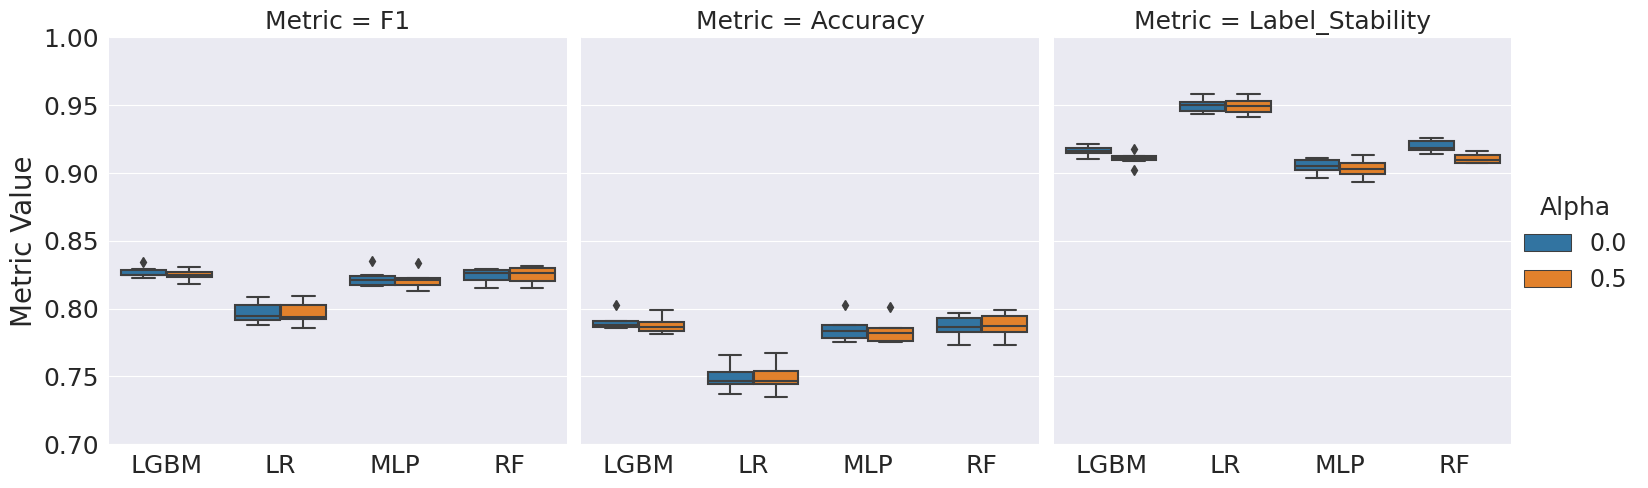

In [106]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.7, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

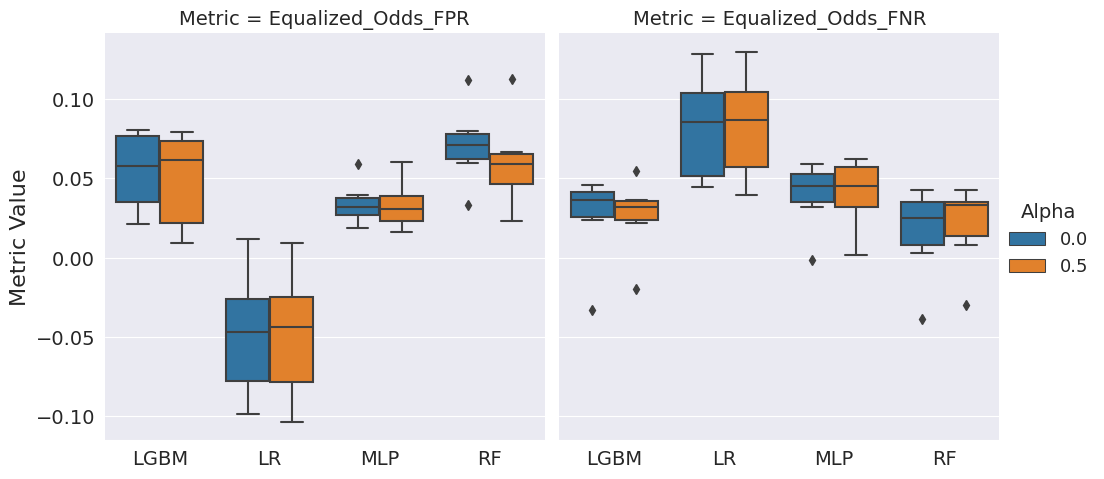

In [107]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='SEX',
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

## Figure 5. Out-of-domain boxplots.

In [108]:
new_vals_to_replace = vals_to_replace
new_vals_to_replace['Test_Set_Index'] = {
    0: 'NY 2018',
    1: 'NY 2017',
    2: 'CA 2018',
    3: 'CA 2017',
}

<Figure size 1200x600 with 0 Axes>

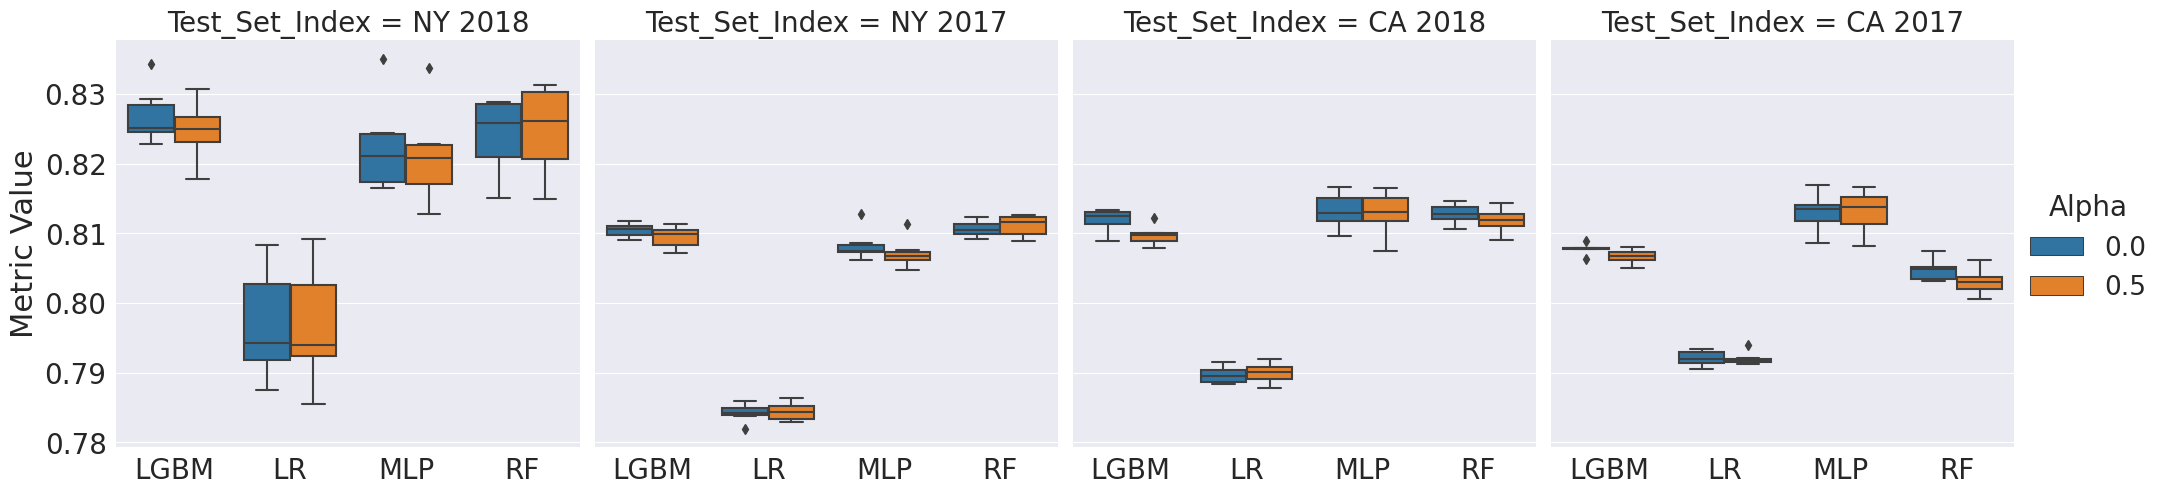

In [109]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='F1',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

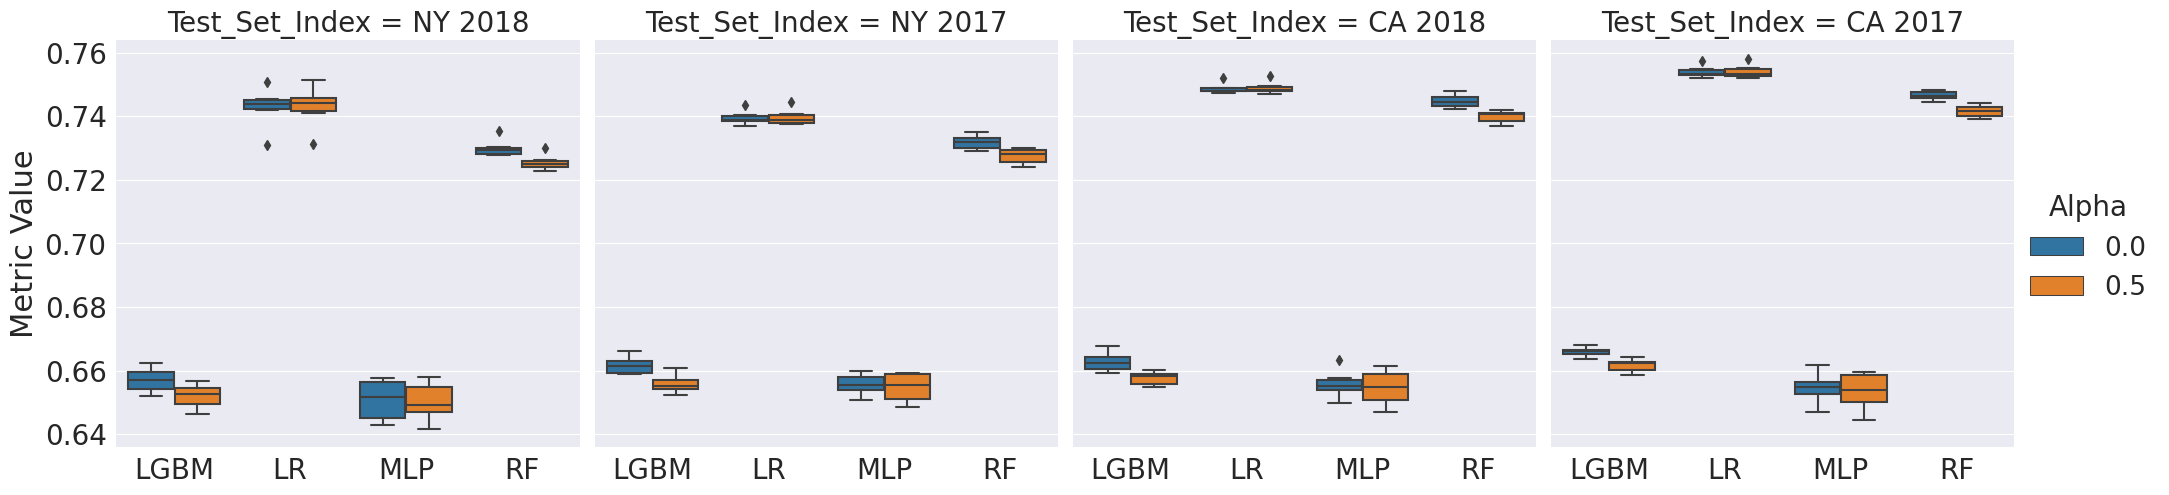

In [110]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Aleatoric_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

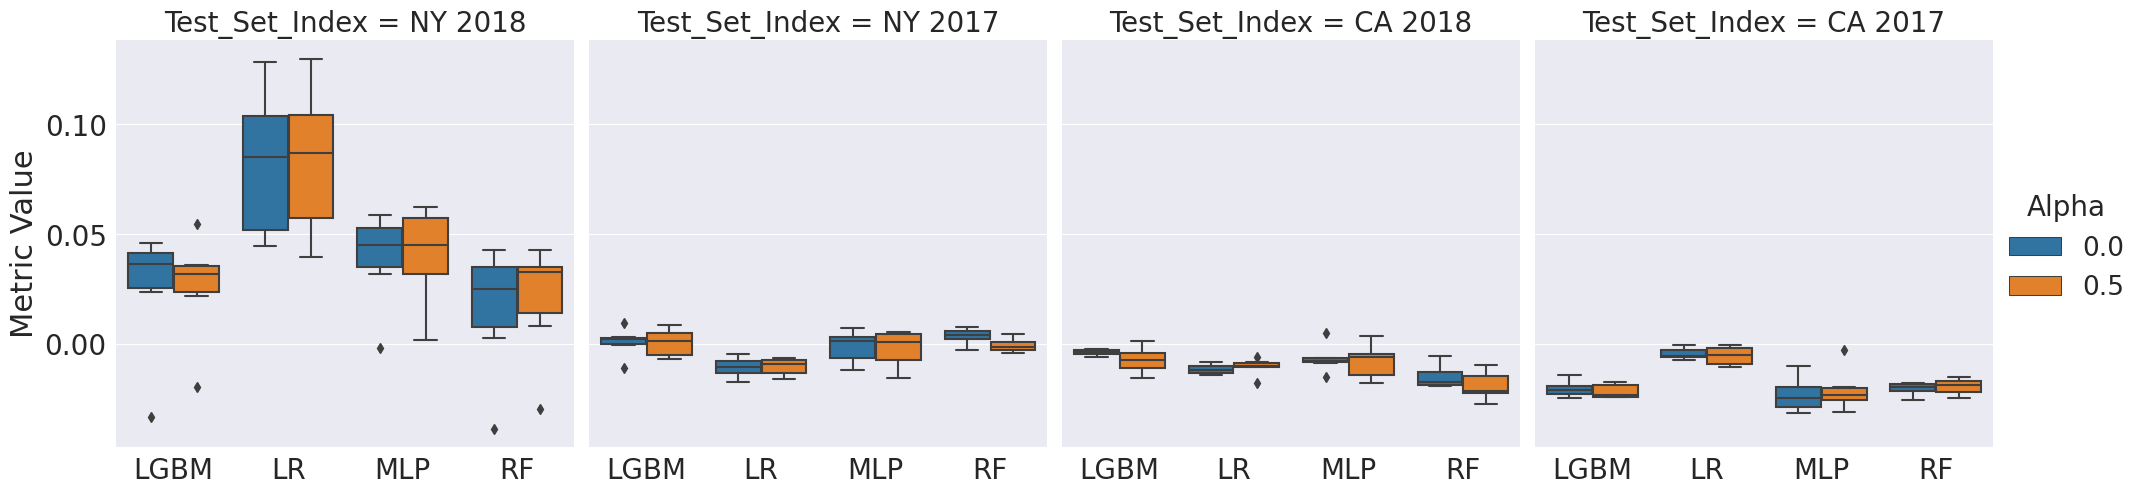

In [111]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='SEX',
                                          vals_to_replace=new_vals_to_replace)

## Figure 3. Scatter plots.

In [112]:
create_scatter_plot(melted_all_group_metrics_per_model_dct,
                    group='SEX',
                    fairness_metric_name='Equalized_Odds_FPR',
                    stability_metric_name='Label_Stability_Ratio')

alt.Chart(...)

In [113]:
create_scatter_plot(melted_all_group_metrics_per_model_dct,
                    group='SEX&RAC1P',
                    fairness_metric_name='Equalized_Odds_FPR',
                    stability_metric_name='Label_Stability_Ratio')

alt.Chart(...)

In [114]:
create_scatter_plot(melted_all_group_metrics_per_model_dct,
                    group='RAC1P',
                    fairness_metric_name='Equalized_Odds_FNR',
                    stability_metric_name='Label_Stability_Ratio')

alt.Chart(...)